In [77]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [71]:
mp_key = "VGJDyi0TH2uezP850Utn6gEwHnI5i365"
mp_id = "mp-961713" #ZrSnPt
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# *Bande interdite*

Visualisation:


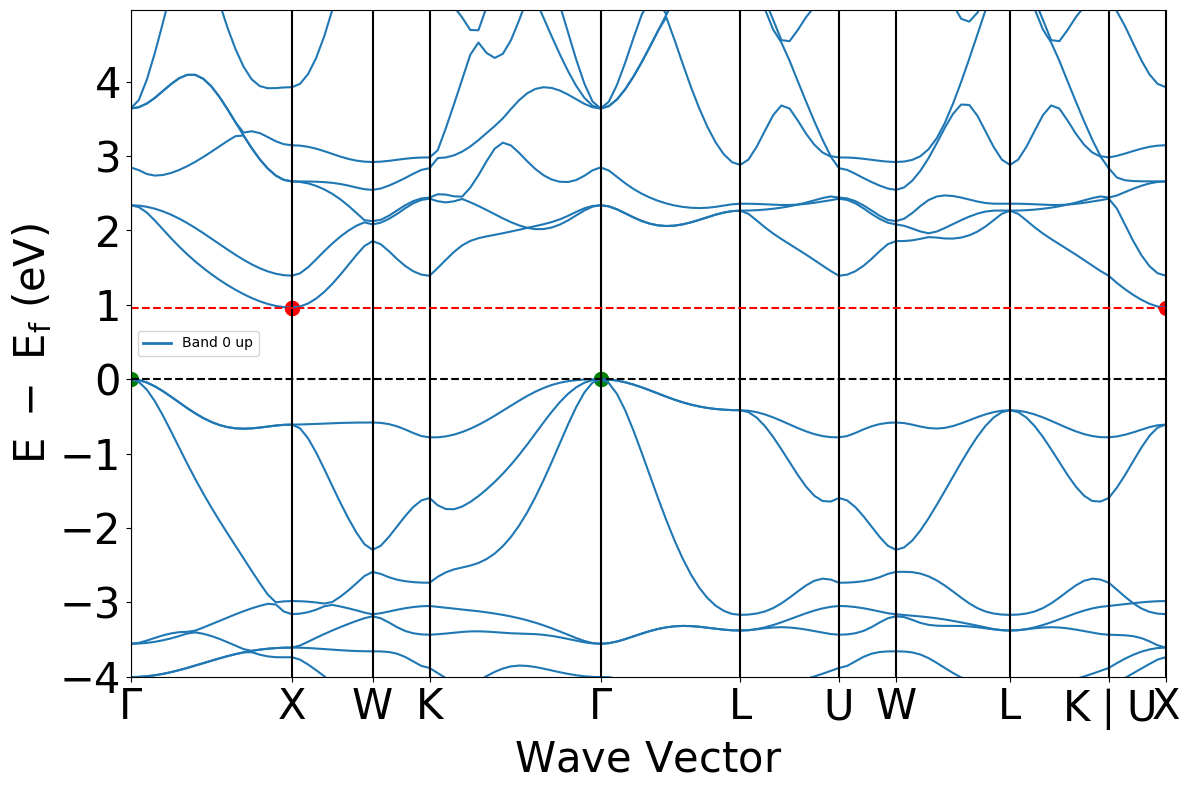

In [72]:
# Visualisation
print("\033[1m" + "Visualisation:" + "\033[0m")
plot = BSPlotter(el_bs)
plt = plot.get_plot(vbm_cbm_marker=True)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=0.9628, color='r', linestyle='--')


In [73]:
band_gap = el_bs.get_band_gap()["energy"]
print('Energie de la bande (largeur):', band_gap, 'eV')
if el_bs.get_band_gap().get('direct') == True:
    print('La bande interdite est direct')
else:
    print('La bande interdite est indirect')

print('La bande interdite se trouve entre 0 eV et {} eV'.format(band_gap))
print("Vecteur de transition :", el_bs.get_band_gap()['transition'])

Energie de la bande (largeur): 0.9627999999999997 eV
La bande interdite est indirect
La bande interdite se trouve entre 0 eV et 0.9627999999999997 eV
Vecteur de transition : \Gamma-X


La bande interdite est plage d'énergie innocupable par les électrons (aucun état électronique permis). C'est l'espace entre la dernière bande de valence et la première bande de conduction. Cette largeur représente l'énergie requise pour qu'un électron se déplace de la bande de valence à la bande de conduction (celle-ci correspond à la valeur disponible sur Material project).

On trouve que la bande de ZrSnPt est indirect car les points rouges (cdm) et verts (vbm) sur le graphe ne sont pas alignés. 

La largeur de la bande étant faible, nous pouvons dire que ce matériau est un semi-conducteur.

La transition se fait du point k Γ au point k X.

# *Directions de dispersion*

La dispersion se réfère à la manière dont l'énergie des niveaux électroniques varie en fonction du vecteur d'onde k dans la structure de bande. Elle mesure l'inclinaison des bandes électroniques par rapport au vecteur d'onde dans différentes directions de la structure de bande. 

Donc, une dispersion forte indique que les électrons peuvent se déplacer plus aisément dans cette direction, tandis qu'une dispersion faible indique que les électrons ont une mobilité limitée dans cette direction.

## Dernière bande de valence

In [74]:
vbm = el_bs.get_vbm() #points verts
kpoint_vbm = vbm['kpoint'].cart_coords
E_vbm = vbm['energy']
data = plot.bs_plot_data()
E_0 = data.get('zero_energy')
print(vbm.get('band_index')) 
print('Ce sont les 3 bandes correspondant à la plus grande énergie de bande de valence (points verts)')
print('Pour le reste du code nous considererons l\'indice 17 comme dernière bande de valence \n')

print('Energie de la bande de valence maximale (vbm) : ', E_vbm, 'eV')
print('Valeur de E-Ef (en ordonnée sur le graphe) : ', E_vbm - E_0, 'eV')
print('Vecteur k :', kpoint_vbm, '(c\'est le centre de la première zone de Brillouin)')

defaultdict(<class 'list'>, {<Spin.up: 1>: [15, 16, 17]})
Ce sont les 3 bandes correspondant à la plus grande énergie de bande de valence (points verts)
Pour le reste du code nous considererons l'indice 17 comme dernière bande de valence 

Energie de la bande de valence maximale (vbm) :  6.2384 eV
Valeur de E-Ef (en ordonnée sur le graphe) :  0.0 eV
Vecteur k : [0. 0. 0.] (c'est le centre de la première zone de Brillouin)


## Première bande de conduction

In [75]:
cbm = el_bs.get_cbm() #points rouges
kpoint_cbm = cbm['kpoint'].cart_coords
E_cbm = cbm['energy']
print(cbm.get('band_index'))
print('C\'est la bande correspondant à la plus basse énergie de bande de conduction (point rouge)', '\n')

print('Energie de la bande de conduction minimale (cbm) : ', E_cbm, 'eV')
print('Valeur de E-Ef (en ordonnée sur le graphe) : ', E_cbm - E_0, 'eV')
print('Vecteur k :', kpoint_cbm)

defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})
C'est la bande correspondant à la plus basse énergie de bande de conduction (point rouge) 

Energie de la bande de conduction minimale (cbm) :  7.2012 eV
Valeur de E-Ef (en ordonnée sur le graphe) :  0.9627999999999997 eV
Vecteur k : [ 0.39943391 -0.56488455  0.69183935]


## Représentation directions de dispersion

 Pente de la dispertion maximale pour la dernière bande de conduction :  1.825412944422185
Direction : X-W
Couleur : vert 

 Pente de la dispertion minimale pour la dernière bande de conduction :  0.0860352736214608
Direction : Γ-L
Couleur : jaune 

 Pente de la dispertion maximale pour la première bande de valence :  0.753257728166137
Direction : K-Γ
Couleur : bleu 

 Pente de la dispertion minimale pour la première bande de valence :  0.057644619297542644
Direction : X-W
Couleur : rouge 

Indices pour les pentes de la dernière bande de conduction: [-1.40595635  1.82541294 -1.3471331   0.91408505 -0.08603527 -1.46156907
  1.34713345  0.59218944 -1.46156945 -1.23439022] 

Indices pour les pentes de la première bande de valence: [-0.62407455  0.05764462 -0.57614512  0.75325773 -0.49284404 -0.60769362
  0.57614527  0.23820557 -0.60769377  0.49462334] 



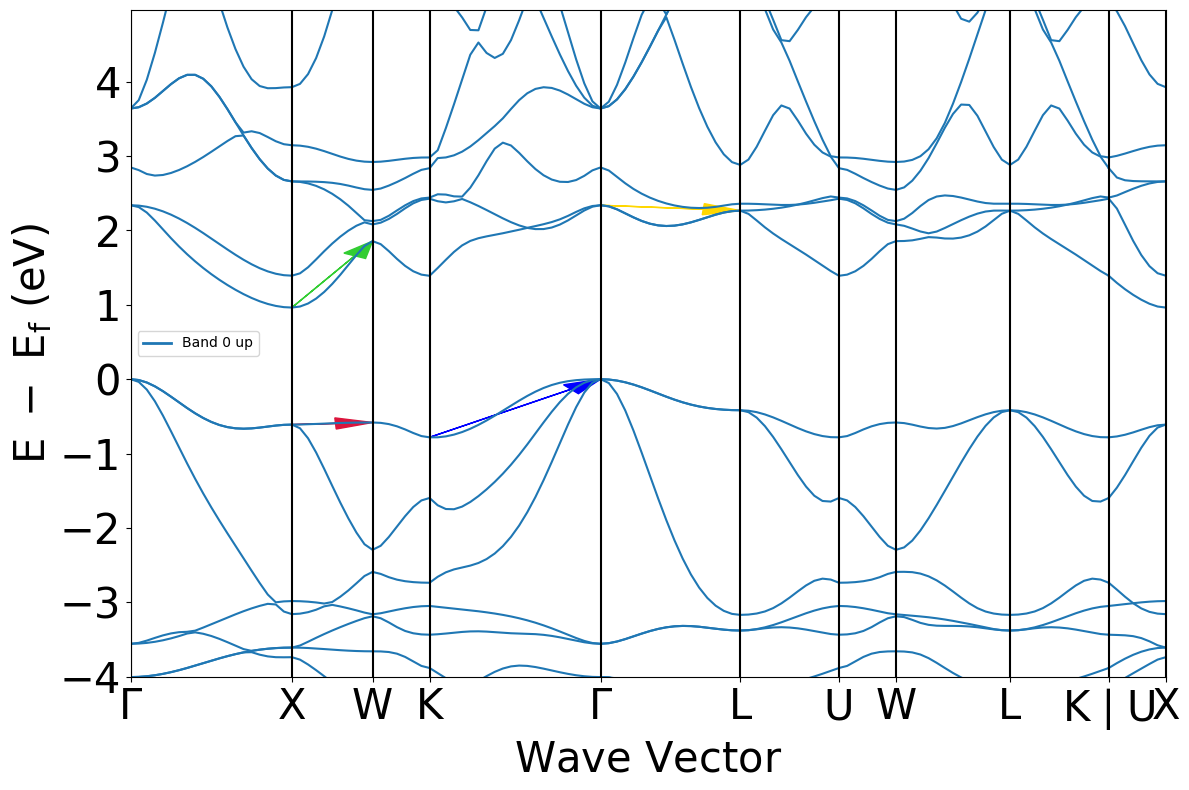

In [78]:
# Distance des points dans la bande et tableau des positions de lignes verticales en évitant les redondances 
x = data.get('ticks').get('distance')
x = np.array([x[0], x[1], x[3], x[5], x[7], x[9], x[11], x[13], x[15], x[17], x[18]])

y = data.get('energy') #E-Ef

delta_x = np.zeros(10)
for i in range(10):
    delta_x[i] = x[i+1] - x[i]

# distance entre les bandes électroniques
delta_yv = np.zeros(10) #conduction
delta_yc = np.zeros(10) #valence
for i in range(10):
    delta_yc[i] =y.get('1')[i][18][-1] - y.get('1')[i][18][0]
    delta_yv[i] =y.get('1')[i][17][-1] - y.get('1')[i][17][0]    

#pentes
slope_c = np.zeros(10) #conduction
slope_v = np.zeros(10) #valence
for i in range (10):
    slope_c[i] = delta_yc[i]/delta_x[i]
    slope_v[i] = delta_yv[i]/delta_x[i] 

print("\033[1m",'Pente de la dispertion maximale pour la dernière bande de conduction :',"\033[0m",max(abs(slope_c)))
print('Direction : X-W')
print('Couleur : vert \n')

print("\033[1m",'Pente de la dispertion minimale pour la dernière bande de conduction :',"\033[0m",min(abs(slope_c)))
print('Direction : Γ-L')
print('Couleur : jaune \n')

print("\033[1m",'Pente de la dispertion maximale pour la première bande de valence :',"\033[0m", max(abs(slope_v)))
print('Direction : K-Γ')
print('Couleur : bleu \n')

print("\033[1m",'Pente de la dispertion minimale pour la première bande de valence :',"\033[0m", min(abs(slope_v)))
print('Direction : X-W')
print('Couleur : rouge \n')

# Print des pentes (permet de selectionner les bons indices correspondant aux pentes minimales et maximales)
print("Indices pour les pentes de la dernière bande de conduction:", slope_c, '\n')
print("Indices pour les pentes de la première bande de valence:", slope_v, '\n')

plot.get_plot()
#pente maximale conduction
plt.arrow(x[1], (y.get('1')[1][18])[0], delta_x[1], delta_yc[1], color = 'limegreen', head_width = 0.15,length_includes_head=True)
#pente minimale conduction
plt.arrow(x[4], (y.get('1')[4][18])[0], delta_x[4], delta_yc[4], color = 'gold', head_width = 0.15,length_includes_head=True)
#pente maximale valence
plt.arrow(x[3], (y.get('1')[3][17])[0], delta_x[3], delta_yv[3], color = 'blue', head_width = 0.15,length_includes_head=True)
#pente minimale valence
plt.arrow(x[1], (y.get('1')[1][17])[0], delta_x[1], delta_yv[1], color = 'crimson', head_width = 0.15,length_includes_head=True)
plt.show()

# *Masse effective*
Si on suppose une dispersion parabolique, l'expression de la masse effective est donnée par:

$m^* = \frac{\hbar^2 k^2}{2 E(k)} = \frac{\hbar^2 (k_x^2 + k_y^2 + k_z^2)}{2 E(k)}$

où E(k) est l'énergie d'un électron de vecteur d'onde k, m est la masse effective et ℏ est la constante de Planck réduite


## Au sommet de la dernière bande de valence

In [79]:
kpoint_val = el_bs.get_vbm().get('kpoint').frac_coords
h_bar = 6.5821e-16
m_vbm = (h_bar**2 * (kpoint_vbm[0]**2+kpoint_vbm[1]**2+kpoint_vbm[2]**2))/(2*E_vbm)
print('Masse effective = {} kg.'.format(m_vbm))
print('Le vecteur k étant [0.0 0.0 0.0], la masse effective est nulle ')

Masse effective = 0.0 kg.
Le vecteur k étant [0.0 0.0 0.0], la masse effective est nulle 


## A la base de la première bande de conduction

In [80]:
m_cbm = (h_bar**2 * (kpoint_cbm[0]**2+kpoint_cbm[1]**2+kpoint_cbm[2]**2))/(2*E_cbm)
print('Masse effective = {} kg.'.format(m_cbm))

Masse effective = 2.8796170816538283e-32 kg.
